In [ ]:
#v2 fig, axes = plt.subplots(2,2, figsize=(8,8))

#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_KF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_KF','Pressure_KF'])
wind_kf = csv_import['Wind_KF']*0.51444 #Knots to m/s
wind_kf = wind_kf.values
#print(wind_kf)
pres_kf = csv_import['Pressure_KF']
pres_kf = pres_kf.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_kf, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_kf, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_kf)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_kf)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_kf, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_kf, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_kf)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_kf)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)


#4. Create variable to store X-Axis data.
# Rearrange time.
#idx   = pd.date_range('2020-04-12 12:00', '2020-04-19 18:45', freq = '1H')
idx   = pd.date_range('2019-03-11 00:00', '2019-03-16 00:00', freq = '3H')
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%d/%M %Hh')

#3. Plot figure and set axis/data resources.
# Create figures subplots.
#axs = plt.subplots(4, 1, constrained_layout=True)
#fig = plt.figure()

# Y-axis range for each plots.
y_major_ticks  = np.arange(10, 60.1, 10)
y_major_ticks2 = np.arange(930, 1010.1, 20)
y_major_ticks3 = np.arange(0, 1, 2)
y_major_ticks4 = np.arange(-4, 5, 0.5)
''''
# Plot the figures.
# Plot 1.
ax1 = plt.subplot2grid((3,3), (0,0),rowspan=1,colspan=2)
ax1.plot(idx,wind_ib,linestyle='-',label='IBTrACS', marker='',linewidth=2,color='C0')  
ax1.plot(idx,wind_kf,linestyle='-',label='MKF',marker='',linewidth=2,color='crimson') 
plt.fill_between(idx, wind_ib, wind_kf,alpha=0.3,color='gray')
ax1.legend(loc='upper left',fontsize=10)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both',  width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.set_yticks(y_major_ticks)
ax1.set_ylabel('Wind Speed (m/s)',fontsize=12, labelpad=10) #Temperature \n [°C]
ax1.set_title('11/03/2019 00:00 to 16/03/2019 00:00')
for label in ax1.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 2.
ax2 = plt.subplot2grid((3,3), (1,0), rowspan=1,colspan=2) 
ax2.plot(idx,pres_ib,label='IBTrACS',linestyle='-',marker='',linewidth=2,color='C0',alpha=1)    
ax2.plot(idx,pres_kf,label='MKF',linestyle='-',marker='',linewidth=2,color='crimson')
plt.fill_between(idx, pres_ib, pres_kf,alpha=0.3,color='gray')
ax2.legend(loc='upper left',fontsize=10)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both',  width=2)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax2.set_yticks(y_major_ticks2)
ax2.set_ylabel('Atmospheric Pressure (hPa) ',fontsize=12, labelpad=10) #\n [hPa]
for label in ax2.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")
'''
# Plot 3.

#fig, ax = plt.subplots(figsize=(10,8))
#fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) \
 #   = plt.subplots(3,4)
    
#sharex=True, 
#                                    sharey=True)

#fig, ((ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10)) = plt.subplots(2,4, figsize=(8,8))
fig, ((ax3, ax5, ax7, ax9), (ax4, ax6, ax8, ax10)) = plt.subplots(2,4, figsize=(13,8))#, sharex=True, 
#                                    sharey=True)



#ax3 = plt.subplot2grid((1,1), (0,0))
#ax3 = plt.subplot(2,4,1)
ax3.scatter(wind_ib,wind_kf,color='C0')   
ax3.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='both',  width=2)
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
ax3.set_yticks(y_major_ticks)
ax3.set_xticks(y_major_ticks)
ax3.set_ylabel('MKF Wind speed (m/s)',fontsize=12, labelpad=10)
ax3.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=10)
ax3.text(44.6,23.8,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax3.text(44.8,26.0,'p < 0.001',color='k',fontsize=12)
else:
    ax3.text(44.8,26.0,'p > 0.001',color='k',fontsize=12)  
ax3.text(44.8,30.4,'MAE: '+mae1,color='k',fontsize=12)
ax3.text(44.8,28.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 4.
#ax4 = plt.subplot2grid((2,2), (0,0),) 
#ax4 = plt.subplot(2,4,2)
ax4.scatter(pres_ib,pres_kf,color='C0')  
ax4.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which='both',  width=2)
ax4.tick_params(which='major', length=7)
ax4.tick_params(which='minor', length=4)
ax4.set_yticks(y_major_ticks2)
ax4.set_xticks(y_major_ticks2)
ax4.set_ylabel('MKF Atmospheric Pressure (hPa)',fontsize=12, labelpad=10)
ax4.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=10)
ax4.text(979.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax4.text(979.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax4.text(979.5,944.2,'p > 0.001',color='k',fontsize=12)
ax4.text(978.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax4.text(978.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)


# Set final fig resources and then save figure.
fig.set_size_inches(13, 13)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
#fig.savefig('feb_mkfwmo_linear_reg_time_series.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)



######


#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Wmo_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MKF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_KF','Pressure_KF'])
wind_kf = csv_import['Wind_KF']*0.51444 #Knots to m/s
wind_kf = wind_kf.values
#print(wind_kf)
pres_kf = csv_import['Pressure_KF']
pres_kf = pres_kf.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_kf, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_kf, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_kf)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_kf)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_kf, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_kf, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_kf)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_kf)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)


#4. Create variable to store X-Axis data.
# Rearrange time.
#idx   = pd.date_range('2020-04-12 12:00', '2020-04-19 18:45', freq = '1H')
idx   = pd.date_range('2019-03-11 00:00', '2019-03-16 00:00', freq = '3H')
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%d/%M %Hh')

#3. Plot figure and set axis/data resources.
# Create figures subplots.
#axs = plt.subplots(4, 1, constrained_layout=True)
#fig = plt.figure()

# Y-axis range for each plots.
y_major_ticks  = np.arange(10, 60.1, 10)
y_major_ticks2 = np.arange(930, 1010.1, 20)
y_major_ticks3 = np.arange(0, 1, 2)
y_major_ticks4 = np.arange(-4, 5, 0.5)
'''
# Plot the figures.
# Plot 1.
ax1 = plt.subplot2grid((3,3), (0,0),rowspan=1,colspan=2)
ax1.plot(idx,wind_ib,linestyle='-',label='IBTrACS', marker='',linewidth=2,color='C0')  
ax1.plot(idx,wind_kf,linestyle='-',label='MKF',marker='',linewidth=2,color='crimson') 
plt.fill_between(idx, wind_ib, wind_kf,alpha=0.3,color='gray')
ax1.legend(loc='upper left',fontsize=10)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both',  width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.set_yticks(y_major_ticks)
ax1.set_ylabel('Wind Speed (m/s)',fontsize=12, labelpad=10) #Temperature \n [°C]
ax1.set_title('11/03/2019 00:00 to 16/03/2019 00:00')
for label in ax1.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 2.
ax2 = plt.subplot2grid((3,3), (1,0), rowspan=1,colspan=2) 
ax2.plot(idx,pres_ib,label='IBTrACS',linestyle='-',marker='',linewidth=2,color='C0',alpha=1)    
ax2.plot(idx,pres_kf,label='MKF',linestyle='-',marker='',linewidth=2,color='crimson')
plt.fill_between(idx, pres_ib, pres_kf,alpha=0.3,color='gray')
ax2.legend(loc='upper left',fontsize=10)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both',  width=2)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax2.set_yticks(y_major_ticks2)
ax2.set_ylabel('Atmospheric Pressure (hPa) ',fontsize=12, labelpad=10) #\n [hPa]
for label in ax2.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")
'''
# Plot 3.
#ax5 =  plt.subplot(2,4,3) #plt.subplot2grid((1,1), (0,1)) 
ax5.scatter(wind_ib,wind_kf,color='C0')   
ax5.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax5.xaxis.set_minor_locator(AutoMinorLocator())
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.tick_params(which='both',  width=2)
ax5.tick_params(which='major', length=7)
ax5.tick_params(which='minor', length=4)
ax5.set_yticks(y_major_ticks)
ax5.set_xticks(y_major_ticks)
ax5.set_ylabel('MKF Wind speed (m/s)',fontsize=12, labelpad=10)
ax5.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=10)
ax5.text(44.6,23.8,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax5.text(44.8,26.0,'p < 0.001',color='k',fontsize=12)
else:
    ax5text(44.8,26.0,'p > 0.001',color='k',fontsize=12)  
ax5.text(44.8,30.4,'MAE: '+mae1,color='k',fontsize=12)
ax5.text(44.8,28.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 4.
#ax6 =  plt.subplot(2,4,4) #plt.subplot2grid((2,2), (0,1),)     
ax6.scatter(pres_ib,pres_kf,color='C0')  
ax6.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax6.xaxis.set_minor_locator(AutoMinorLocator())
ax6.yaxis.set_minor_locator(AutoMinorLocator())
ax6.tick_params(which='both',  width=2)
ax6.tick_params(which='major', length=7)
ax6.tick_params(which='minor', length=4)
ax6.set_yticks(y_major_ticks2)
ax6.set_xticks(y_major_ticks2)
ax6.set_ylabel('MKF Atmospheric Pressure (hPa)',fontsize=12, labelpad=10)
ax6.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=10)
ax6.text(979.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax6.text(979.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax6.text(979.5,944.2,'p > 0.001',color='k',fontsize=12)
ax6.text(978.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax6.text(978.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)


# Set final fig resources and then save figure.
fig.set_size_inches(13, 13)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
#ig.savefig('feb_mkfwmo_linear_reg_time_series.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)

#######3
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Wmo_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MKF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_KF','Pressure_KF'])
wind_kf = csv_import['Wind_KF']*0.51444 #Knots to m/s
wind_kf = wind_kf.values
#print(wind_kf)
pres_kf = csv_import['Pressure_KF']
pres_kf = pres_kf.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_kf, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_kf, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_kf)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_kf)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_kf, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_kf, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_kf)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_kf)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)


#4. Create variable to store X-Axis data.
# Rearrange time.
#idx   = pd.date_range('2020-04-12 12:00', '2020-04-19 18:45', freq = '1H')
idx   = pd.date_range('2019-03-11 00:00', '2019-03-16 00:00', freq = '3H')
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%d/%M %Hh')

#3. Plot figure and set axis/data resources.
# Create figures subplots.
#axs = plt.subplots(4, 1, constrained_layout=True)
#fig = plt.figure()

# Y-axis range for each plots.
y_major_ticks  = np.arange(10, 60.1, 10)
y_major_ticks2 = np.arange(930, 1010.1, 20)
y_major_ticks3 = np.arange(0, 1, 2)
y_major_ticks4 = np.arange(-4, 5, 0.5)
'''
# Plot the figures.
# Plot 1.
ax1 = plt.subplot2grid((3,3), (0,0),rowspan=1,colspan=2)
ax1.plot(idx,wind_ib,linestyle='-',label='IBTrACS', marker='',linewidth=2,color='C0')  
ax1.plot(idx,wind_kf,linestyle='-',label='MKF',marker='',linewidth=2,color='crimson') 
plt.fill_between(idx, wind_ib, wind_kf,alpha=0.3,color='gray')
ax1.legend(loc='upper left',fontsize=10)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both',  width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.set_yticks(y_major_ticks)
ax1.set_ylabel('Wind Speed (m/s)',fontsize=12, labelpad=10) #Temperature \n [°C]
ax1.set_title('11/03/2019 00:00 to 16/03/2019 00:00')
for label in ax1.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 2.
ax2 = plt.subplot2grid((3,3), (1,0), rowspan=1,colspan=2) 
ax2.plot(idx,pres_ib,label='IBTrACS',linestyle='-',marker='',linewidth=2,color='C0',alpha=1)    
ax2.plot(idx,pres_kf,label='MKF',linestyle='-',marker='',linewidth=2,color='crimson')
plt.fill_between(idx, pres_ib, pres_kf,alpha=0.3,color='gray')
ax2.legend(loc='upper left',fontsize=10)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both',  width=2)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax2.set_yticks(y_major_ticks2)
ax2.set_ylabel('Atmospheric Pressure (hPa) ',fontsize=12, labelpad=10) #\n [hPa]
for label in ax2.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")
'''
# Plot 3.
#ax7 =  plt.subplot(2,4,5) #plt.subplot2grid((1,1), (0,2)) 
ax7.scatter(wind_ib,wind_kf,color='C0')   
ax7.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax7.xaxis.set_minor_locator(AutoMinorLocator())
ax7.yaxis.set_minor_locator(AutoMinorLocator())
ax7.tick_params(which='both',  width=2)
ax7.tick_params(which='major', length=7)
ax7.tick_params(which='minor', length=4)
ax7.set_yticks(y_major_ticks)
ax7.set_xticks(y_major_ticks)
ax7.set_ylabel('MKF Wind speed (m/s)',fontsize=12, labelpad=10)
ax7.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=10)
ax7.text(44.6,23.8,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax7.text(44.8,26.0,'p < 0.001',color='k',fontsize=12)
else:
    ax7.text(44.8,26.0,'p > 0.001',color='k',fontsize=12)  
ax7.text(44.8,30.4,'MAE: '+mae1,color='k',fontsize=12)
ax7.text(44.8,28.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 4.
#ax8=  plt.subplot(2,4,6) #plt.subplot2grid((2,2), (0,2),)     
ax8.scatter(pres_ib,pres_kf,color='C0')  
ax8.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax8.xaxis.set_minor_locator(AutoMinorLocator())
ax8.yaxis.set_minor_locator(AutoMinorLocator())
ax8.tick_params(which='both',  width=2)
ax8.tick_params(which='major', length=7)
ax8.tick_params(which='minor', length=4)
ax8.set_yticks(y_major_ticks2)
ax8.set_xticks(y_major_ticks2)
ax8.set_ylabel('MKF Atmospheric Pressure (hPa)',fontsize=12, labelpad=10)
ax8.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=10)
ax8.text(979.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax8.text(979.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax8.text(979.5,944.2,'p > 0.001',color='k',fontsize=12)
ax8.text(978.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax8.text(978.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)


# Set final fig resources and then save figure.
fig.set_size_inches(13, 13)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
#fig.savefig('feb_mkfwmo_linear_reg_time_series.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)

#######4
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Wmo_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MKF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_KF','Pressure_KF'])
wind_kf = csv_import['Wind_KF']*0.51444 #Knots to m/s
wind_kf = wind_kf.values
#print(wind_kf)
pres_kf = csv_import['Pressure_KF']
pres_kf = pres_kf.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_kf, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_kf, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_kf)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_kf)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_kf, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_kf, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_kf)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_kf)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)


#4. Create variable to store X-Axis data.
# Rearrange time.
#idx   = pd.date_range('2020-04-12 12:00', '2020-04-19 18:45', freq = '1H')
idx   = pd.date_range('2019-03-11 00:00', '2019-03-16 00:00', freq = '3H')
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%d/%M %Hh')

#3. Plot figure and set axis/data resources.
# Create figures subplots.
#axs = plt.subplots(4, 1, constrained_layout=True)
#fig = plt.figure()

# Y-axis range for each plots.
y_major_ticks  = np.arange(10, 60.1, 10)
y_major_ticks2 = np.arange(930, 1010.1, 20)
y_major_ticks3 = np.arange(0, 1, 2)
y_major_ticks4 = np.arange(-4, 5, 0.5)
'''
# Plot the figures.
# Plot 1.
ax1 = plt.subplot2grid((3,3), (0,0),rowspan=1,colspan=2)
ax1.plot(idx,wind_ib,linestyle='-',label='IBTrACS', marker='',linewidth=2,color='C0')  
ax1.plot(idx,wind_kf,linestyle='-',label='MKF',marker='',linewidth=2,color='crimson') 
plt.fill_between(idx, wind_ib, wind_kf,alpha=0.3,color='gray')
ax1.legend(loc='upper left',fontsize=10)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both',  width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.set_yticks(y_major_ticks)
ax1.set_ylabel('Wind Speed (m/s)',fontsize=12, labelpad=10) #Temperature \n [°C]
ax1.set_title('11/03/2019 00:00 to 16/03/2019 00:00')
for label in ax1.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 2.
ax2 = plt.subplot2grid((3,3), (1,0), rowspan=1,colspan=2) 
ax2.plot(idx,pres_ib,label='IBTrACS',linestyle='-',marker='',linewidth=2,color='C0',alpha=1)    
ax2.plot(idx,pres_kf,label='MKF',linestyle='-',marker='',linewidth=2,color='crimson')
plt.fill_between(idx, pres_ib, pres_kf,alpha=0.3,color='gray')
ax2.legend(loc='upper left',fontsize=10)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both',  width=2)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax2.set_yticks(y_major_ticks2)
ax2.set_ylabel('Atmospheric Pressure (hPa) ',fontsize=12, labelpad=10) #\n [hPa]
for label in ax2.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")
'''
# Plot 3.
#ax9 =  plt.subplot(2,4,7) #plt.subplot2grid((1,1), (0,3)) 
ax9.scatter(wind_ib,wind_kf,color='C0')   
ax9.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax9.xaxis.set_minor_locator(AutoMinorLocator())
ax9.yaxis.set_minor_locator(AutoMinorLocator())
ax9.tick_params(which='both',  width=2)
ax9.tick_params(which='major', length=7)
ax9.tick_params(which='minor', length=4)
ax9.set_yticks(y_major_ticks)
ax9.set_xticks(y_major_ticks)
ax9.set_ylabel('MKF Wind speed (m/s)',fontsize=12, labelpad=10)
ax9.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=10)
ax9.text(44.6,23.8,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax9.text(44.8,26.0,'p < 0.001',color='k',fontsize=12)
else:
    ax9.text(44.8,26.0,'p > 0.001',color='k',fontsize=12)  
ax9.text(44.8,30.4,'MAE: '+mae1,color='k',fontsize=12)
ax9.text(44.8,28.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 4.
#ax10 =  plt.subplot(2,4,8) #plt.subplot2grid((2,2), (0,3),)     
ax10.scatter(pres_ib,pres_kf,color='C0')  
ax10.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax10.xaxis.set_minor_locator(AutoMinorLocator())
ax10.yaxis.set_minor_locator(AutoMinorLocator())
ax10.tick_params(which='both',  width=2)
ax10.tick_params(which='major', length=7)
ax10.tick_params(which='minor', length=4)
ax10.set_yticks(y_major_ticks2)
ax10.set_xticks(y_major_ticks2)
ax10.set_ylabel('MKF Atmospheric Pressure (hPa)',fontsize=12, labelpad=10)
ax10.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=10)
ax10.text(979.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax10.text(979.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax10.text(979.5,944.2,'p > 0.001',color='k',fontsize=12)
ax10.text(978.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax10.text(978.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)


# Set final fig resources and then save figure.
fig.set_size_inches(13, 13)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
fig.savefig('Panel_feb_mkfrewmo_linear_reg_time_series.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)




import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'product_type':'monthly_averaged_reanalysis',
        'variable':'2m_temperature',
        'year':'2003',
        'month':'06',
        'time':'00:00',
        'format':'netcdf'
    },
    'download.nc')

def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data,len(data))) for _ in range(n_boots) ]


#pollution = pd.read_csv('./dataset/pollution_wide.csv')
pollution = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/Swarmplot_4.csv',keep_default_na=True, delimiter=',')
#, header=None,names=['Wind_KF','Pressure_KF'])

cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2);

# Draw histogram of bootstrap samples
sns.distplot(boot_means, bins = 100, kde = False);




city_boots = pd.DataFrame()

for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    # Filter to city
    city_NO2 = pollution_may[pollution_may.city  ==  city].NO2
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "city", x = "NO2_avg", data = city_boots, color = 'coral');

Last updated on Mon Feb 20 22:34:46 2023


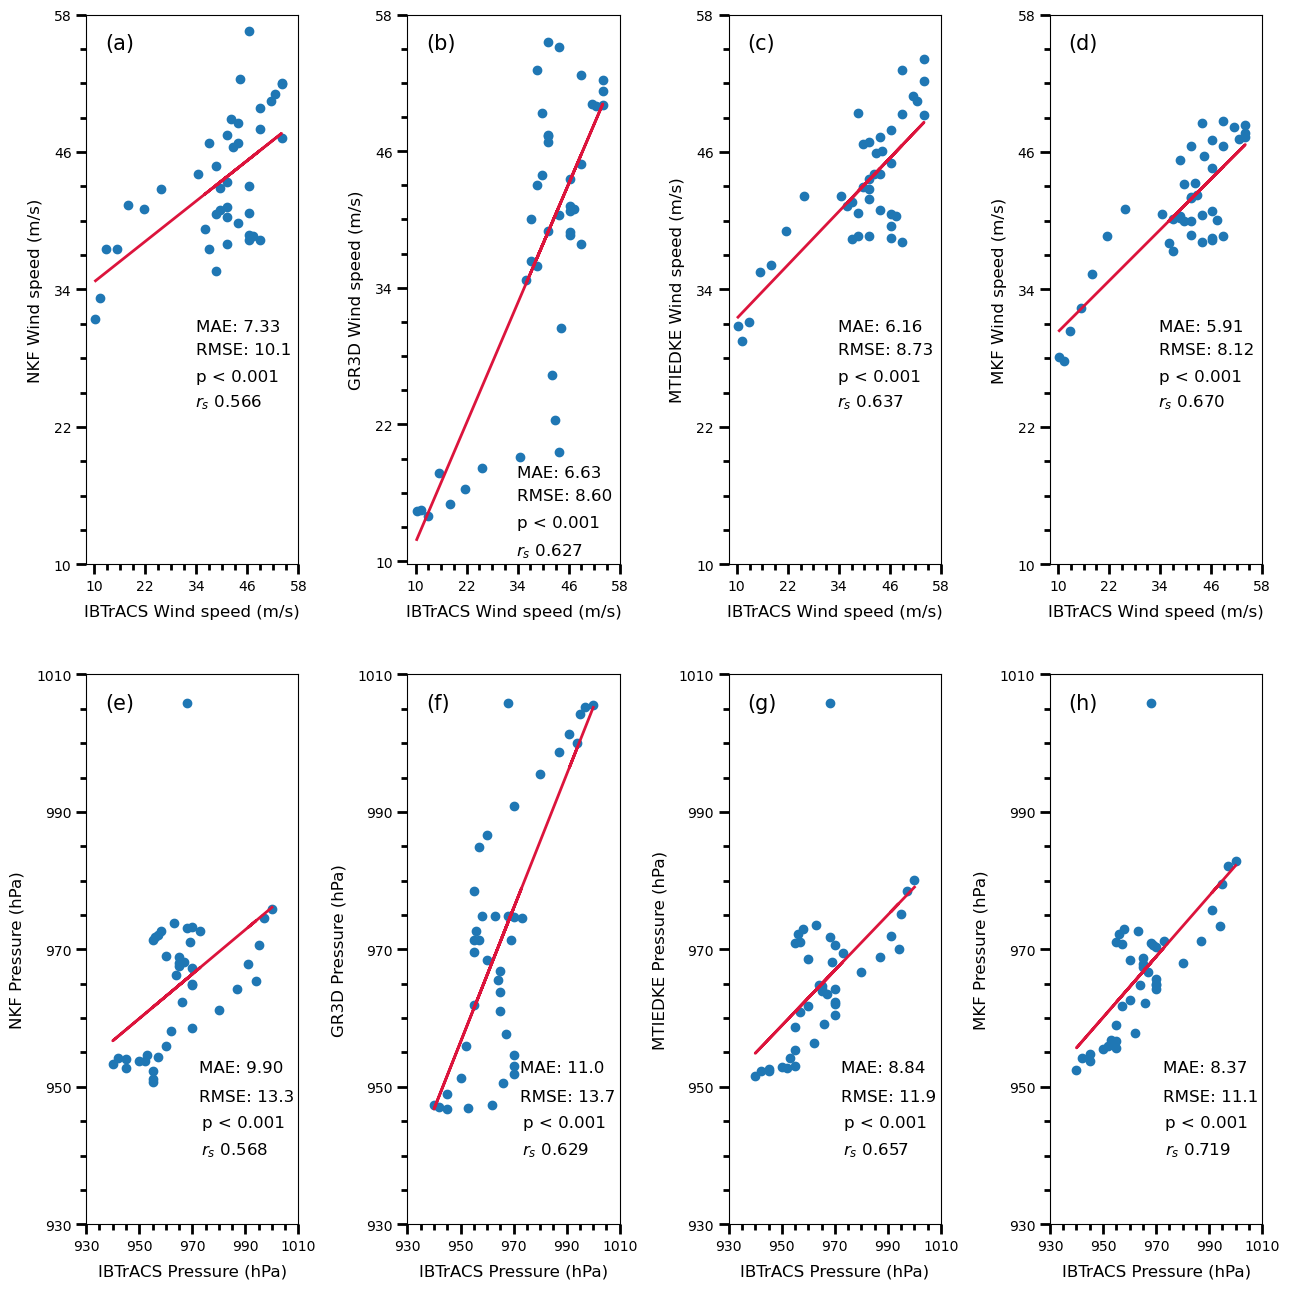

In [66]:
#v2 fig, axes = plt.subplots(2,2, figsize=(8,8))

#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
from matplotlib.offsetbox import AnchoredText


# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#import datetime as datetime
#from datetime import datetime
# Current date time in local system
#now = datetime.now()
#print('Last time updated:', datetime.now())
import datetime as datetime
print('Last updated on {}'.format(datetime.datetime.now().ctime()))
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])


###### KF

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ib = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_KF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_KF','Pressure_KF'])
wind_kf = csv_import['Wind_KF']*0.51444 #Knots to m/s
wind_kf = wind_kf.values
#print(wind_kf)
pres_kf = csv_import['Pressure_KF']
pres_kf = pres_kf.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_kf, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_kf, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_kf)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_kf)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_kf, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_kf, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_kf)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_kf)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)

# Y-axis range for each plots.
y_major_ticks  = np.arange(10, 60.1, 12)
y_major_ticks2 = np.arange(930, 1010.1, 20)
y_major_ticks3 = np.arange(0, 1, 2)
y_major_ticks4 = np.arange(-4, 5, 0.5)


# Plot 1.
#fig, ax = plt.subplots(figsize=(10,8))
#fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) \
 
#fig, ((ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10)) = plt.subplots(2,4, figsize=(8,8))
fig, ((ax3, ax5, ax7, ax9), (ax4, ax6, ax8, ax10)) = plt.subplots(2,4, figsize=(13,13))#, sharex=True, 

#### Plot 1
#ax3 = plt.subplot2grid((1,1), (0,0))
#ax3 = plt.subplot(2,4,1)
ax3.scatter(wind_ib,wind_kf,color='C0')   
ax3.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='both',  width=2)
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
ax3.set_yticks(y_major_ticks)
ax3.set_xticks(y_major_ticks)
ax3.set_ylabel('NKF Wind speed (m/s)',fontsize=12, labelpad=8)
ax3.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=8)
ax3.text(33.6,23.8,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax3.text(33.8,26.0,'p < 0.001',color='k',fontsize=12)
else:
    ax3.text(40.8,26.0,'p > 0.001',color='k',fontsize=12)  
ax3.text(33.8,30.4,'MAE: '+mae1,color='k',fontsize=12)
ax3.text(33.8,28.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 1.
#ax4 = plt.subplot2grid((2,2), (0,0),) 
#ax4 = plt.subplot(2,4,2)
ax4.scatter(pres_ib,pres_kf,color='C0')  
ax4.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which='both',  width=2)
ax4.tick_params(which='major', length=7)
ax4.tick_params(which='minor', length=4)
ax4.set_yticks(y_major_ticks2)
ax4.set_xticks(y_major_ticks2)
ax4.set_ylabel('NKF Pressure (hPa)',fontsize=12, labelpad=8)
ax4.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=8)
ax4.text(973.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax4.text(973.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax4.text(973.5,944.2,'p > 0.001',color='k',fontsize=12)
ax4.text(972.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax4.text(972.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)


###### GR3D

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_GR3D_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_GR3D','Pressure_GR3D'])
wind_gr3d = csv_import['Wind_GR3D']*0.51444 #Knots to m/s
wind_gr3d = wind_gr3d.values
#print(wind_gr3d)
pres_gr3d = csv_import['Pressure_GR3D']
pres_gr3d = pres_gr3d.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_gr3d, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_gr3d, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_gr3d)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_gr3d)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_gr3d, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_gr3d, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_gr3d)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_gr3d)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)

# Plot 2.
#ax5 =  plt.subplot(2,4,3) #plt.subplot2grid((1,1), (0,1)) 
ax5.scatter(wind_ib,wind_gr3d,color='C0')   
ax5.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax5.xaxis.set_minor_locator(AutoMinorLocator())
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.tick_params(which='both',  width=2)
ax5.tick_params(which='major', length=7)
ax5.tick_params(which='minor', length=4)
ax5.set_yticks(y_major_ticks)
ax5.set_xticks(y_major_ticks)
ax5.set_ylabel('GR3D Wind speed (m/s)',fontsize=12, labelpad=8)
ax5.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=8)
ax5.text(33.6,10.5,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax5.text(33.8,13.0,'p < 0.001',color='k',fontsize=12)
else:
    ax5text(33.8,13.0,'p > 0.001',color='k',fontsize=12)  
ax5.text(33.8,17.4,'MAE: '+mae1,color='k',fontsize=12)
ax5.text(33.8,15.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 2.
#ax6 =  plt.subplot(2,4,4) #plt.subplot2grid((2,2), (0,1),)     
ax6.scatter(pres_ib,pres_gr3d,color='C0')  
ax6.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax6.xaxis.set_minor_locator(AutoMinorLocator())
ax6.yaxis.set_minor_locator(AutoMinorLocator())
ax6.tick_params(which='both',  width=2)
ax6.tick_params(which='major', length=7)
ax6.tick_params(which='minor', length=4)
ax6.set_yticks(y_major_ticks2)
ax6.set_xticks(y_major_ticks2)
ax6.set_ylabel('GR3D Pressure (hPa)',fontsize=12, labelpad=8)
ax6.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=8)
ax6.text(973.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax6.text(973.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax6.text(973.5,944.2,'p > 0.001',color='k',fontsize=12)
ax6.text(972.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax6.text(972.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)

####### MTIEDKE
csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MTKE_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_MT','Pressure_MT'])
wind_mt= csv_import['Wind_MT']*0.51444 #Knots to m/s
wind_mt = wind_mt.values
#print(wind_kf)
pres_mt = csv_import['Pressure_MT']
pres_mt = pres_mt.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_mt, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_mt, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_mt)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_mt)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_mt, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_mt, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_mt)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_mt)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)


# Plot 3.
#ax7 =  plt.subplot(2,4,5) #plt.subplot2grid((1,1), (0,2)) 
ax7.scatter(wind_ib,wind_mt,color='C0')   
ax7.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax7.xaxis.set_minor_locator(AutoMinorLocator())
ax7.yaxis.set_minor_locator(AutoMinorLocator())
ax7.tick_params(which='both',  width=2)
ax7.tick_params(which='major', length=7)
ax7.tick_params(which='minor', length=4)
ax7.set_yticks(y_major_ticks)
ax7.set_xticks(y_major_ticks)
ax7.set_ylabel('MTIEDKE Wind speed (m/s)',fontsize=12, labelpad=8)
ax7.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=8)
ax7.text(33.6,23.8,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax7.text(33.8,26.0,'p < 0.001',color='k',fontsize=12)
else:
    ax7.text(33.8,26.0,'p > 0.001',color='k',fontsize=12)  
ax7.text(33.8,30.4,'MAE: '+mae1,color='k',fontsize=12)
ax7.text(33.8,28.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 3.
#ax8=  plt.subplot(2,4,6) #plt.subplot2grid((2,2), (0,2),)     
ax8.scatter(pres_ib,pres_mt,color='C0')  
ax8.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax8.xaxis.set_minor_locator(AutoMinorLocator())
ax8.yaxis.set_minor_locator(AutoMinorLocator())
ax8.tick_params(which='both',  width=2)
ax8.tick_params(which='major', length=7)
ax8.tick_params(which='minor', length=4)
ax8.set_yticks(y_major_ticks2)
ax8.set_xticks(y_major_ticks2)
ax8.set_ylabel('MTIEDKE Pressure (hPa)',fontsize=12, labelpad=8)
ax8.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=8)
ax8.text(973.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax8.text(973.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax8.text(973.5,944.2,'p > 0.001',color='k',fontsize=12)
ax8.text(972.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax8.text(972.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)


####### MKF
csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MKF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_MKF','Pressure_MKF'])
wind_mkf = csv_import['Wind_MKF']*0.51444 #Knots to m/s
wind_mkf = wind_mkf.values
#print(wind_kf)
pres_mkf = csv_import['Pressure_MKF']
pres_mkf = pres_mkf.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_mkf, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_mkf, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_mkf)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_mkf)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_mkf, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_mkf, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_mkf)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_mkf)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)

# Plot 4.
#ax9 =  plt.subplot(2,4,7) #plt.subplot2grid((1,1), (0,3)) 
ax9.scatter(wind_ib,wind_mkf,color='C0')   
ax9.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax9.xaxis.set_minor_locator(AutoMinorLocator())
ax9.yaxis.set_minor_locator(AutoMinorLocator())
ax9.tick_params(which='both',  width=2)
ax9.tick_params(which='major', length=7)
ax9.tick_params(which='minor', length=4)
ax9.set_yticks(y_major_ticks)
ax9.set_xticks(y_major_ticks)
ax9.set_ylabel('MKF Wind speed (m/s)',fontsize=12, labelpad=8)
ax9.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=8)
ax9.text(33.6,23.8,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax9.text(33.8,26.0,'p < 0.001',color='k',fontsize=12)
else:
    ax9.text(33.8,26.0,'p > 0.001',color='k',fontsize=12)  
ax9.text(33.8,30.4,'MAE: '+mae1,color='k',fontsize=12)
ax9.text(33.8,28.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 4.
#ax10 =  plt.subplot(2,4,8) #plt.subplot2grid((2,2), (0,3),)     
ax10.scatter(pres_ib,pres_mkf,color='C0')  
ax10.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax10.xaxis.set_minor_locator(AutoMinorLocator())
ax10.yaxis.set_minor_locator(AutoMinorLocator())
ax10.tick_params(which='both',  width=2)
ax10.tick_params(which='major', length=7)
ax10.tick_params(which='minor', length=4)
ax10.set_yticks(y_major_ticks2)
ax10.set_xticks(y_major_ticks2)
ax10.set_ylabel('MKF Pressure (hPa)',fontsize=12, labelpad=8)
ax10.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=8)
ax10.text(973.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax10.text(973.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax10.text(973.5,944.2,'p > 0.001',color='k',fontsize=12)
ax10.text(972.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax10.text(972.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)

#Label figures

a3 = AnchoredText("(a)", loc='upper left', prop=dict(size=15), frameon=False); ax3.add_artist(a3) #True)
a5 = AnchoredText("(b)", loc='upper left', prop=dict(size=15), frameon=False); ax5.add_artist(a5) #True)
a7 = AnchoredText("(c)", loc='upper left', prop=dict(size=15), frameon=False); ax7.add_artist(a7) #True)
a9 = AnchoredText("(d)", loc='upper left', prop=dict(size=15), frameon=False); ax9.add_artist(a9)  #True)
a4 = AnchoredText("(e)", loc='upper left', prop=dict(size=15), frameon=False); ax4.add_artist(a4) #True)
a6 = AnchoredText("(f)", loc='upper left', prop=dict(size=15), frameon=False); ax6.add_artist(a6) #True)
a8 = AnchoredText("(g)", loc='upper left', prop=dict(size=15), frameon=False); ax8.add_artist(a8) #True)
a10 = AnchoredText("(h)", loc='upper left', prop=dict(size=15), frameon=False); ax10.add_artist(a10) #True)
#plt.draw() is necessary to update the plot and show the new text.

# Set final fig resources and then save 
fig.set_size_inches(13, 13)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.2)
fig.savefig('/mnt/d/2023/Track/11_16_Rmse_p_value/Feb_8Panel_IBTrACS-Reu_CPSs_Statisticsg.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)
fig.savefig('/mnt/d/2023/Track/11_16_Rmse_p_value/Feb_8Panel_IBTrACS-Reu_CPSs_Statisticsg.pdf',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)



In [ ]:
#Below analyses Willmott D1

Last updated on Tue Feb 21 21:12:05 2023


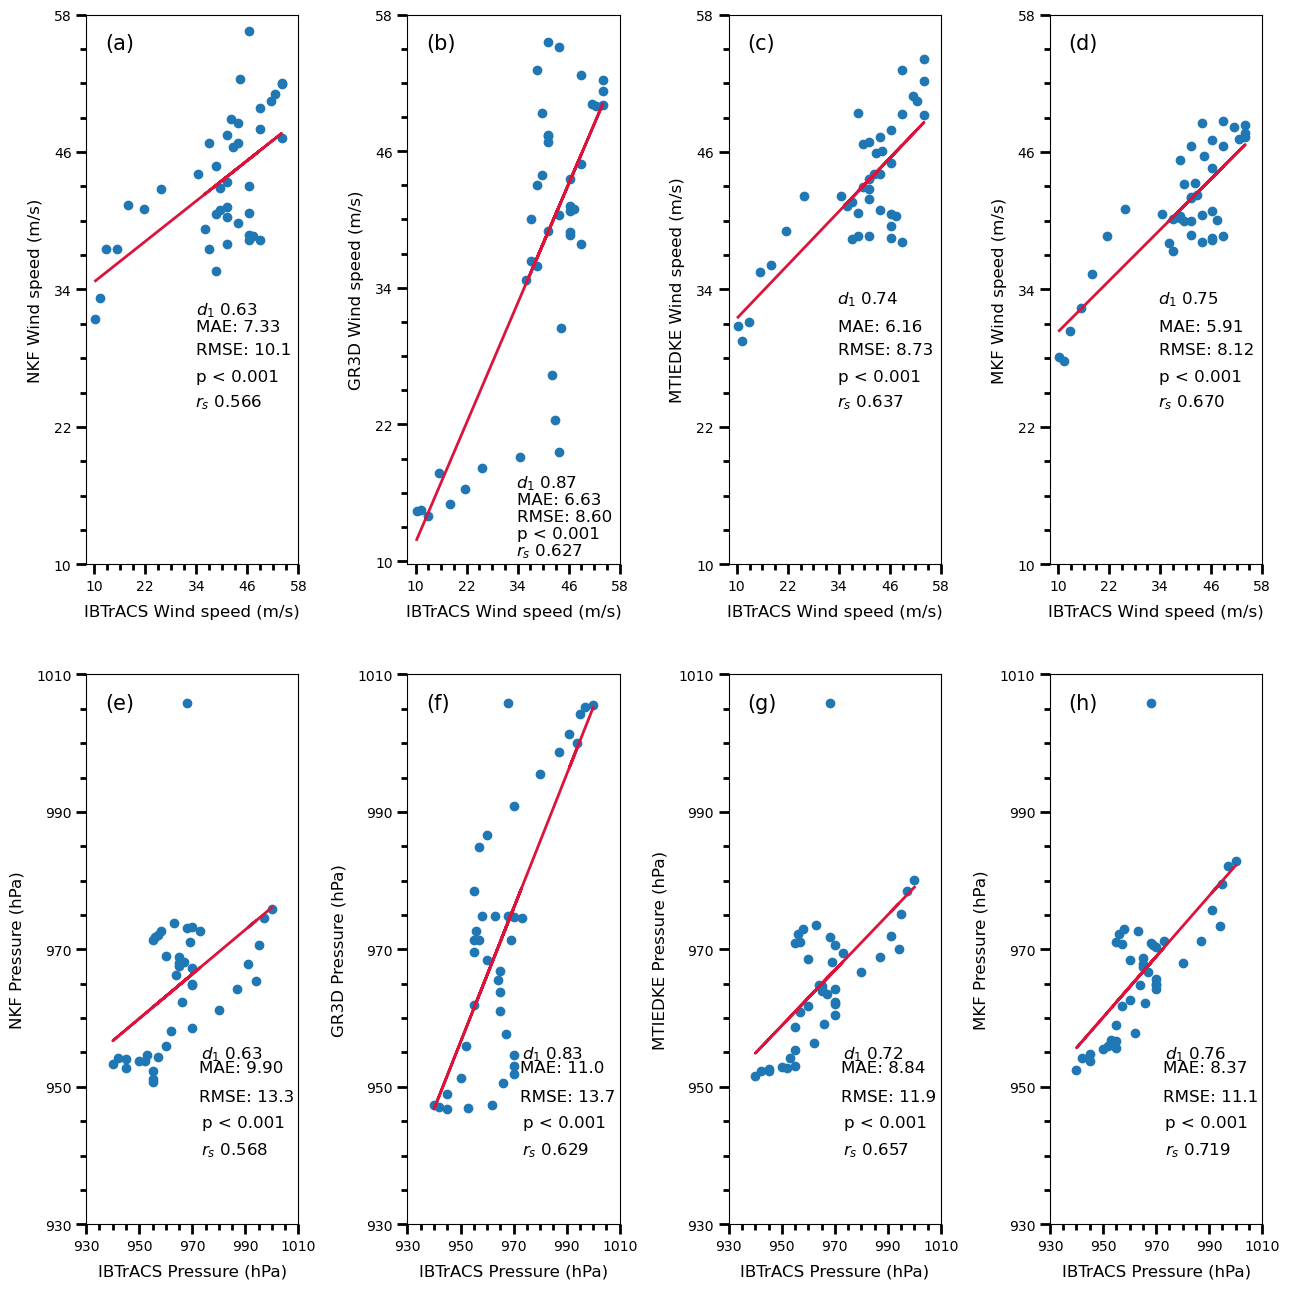

In [76]:
#v2 fig, axes = plt.subplots(2,2, figsize=(8,8))

#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
from matplotlib.offsetbox import AnchoredText


# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#import datetime as datetime
#from datetime import datetime
# Current date time in local system
#now = datetime.now()
#print('Last time updated:', datetime.now())
import datetime as datetime
print('Last updated on {}'.format(datetime.datetime.now().ctime()))
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])


###### KF

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ib = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_KF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_KF','Pressure_KF'])
wind_kf = csv_import['Wind_KF']*0.51444 #Knots to m/s
wind_kf = wind_kf.values
#print(wind_kf)
pres_kf = csv_import['Pressure_KF']
pres_kf = pres_kf.values


#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Wind Speed (m/s))
stats = scipy.stats.spearmanr(wind_ib,wind_kf, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_kf, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_kf)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_kf)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

def filter_nan(wind_kf,wind_ib):
    """
    this functions removed the data  from simulated and observed data
    whereever the observed data contains nan
    
    this is used by all other functions, otherwise they will produce nan as 
    output
    """
    if np.sum(~np.isnan(wind_kf*wind_ib))>=1:
        data = np.array([wind_kf.flatten(),wind_ib.flatten()])
        data = np.transpose(data)
        data = data[~np.isnan(data).any(1)]
        wind_kf = data[:,0]
        wind_ib = data[:,1]
    return wind_kf, wind_ib

#def index_agreement(wind_kf, wind_ib):
"""
index of agreement

Willmott (1981, 1982) 
input:
    s: simulated #wind_kf
    o: observed #wind_ib
output:
    ia: index of agreement
"""
wind_kf,wind_ib = filter_nan(wind_kf,wind_ib)
wkf = 1 -(np.sum((wind_ib-wind_kf)**2))/(np.sum(
            (np.abs(wind_kf-np.mean(wind_ib))+np.abs(wind_ib-np.mean(wind_ib)))**2))
 #   return ia
wkf = str(wkf)
wkf = wkf[0:4]


# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_kf, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_kf, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_kf)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_kf)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)

def filter_nan(pres_kf,pres_ib):
    """
    this functions removed the data  from simulated and observed data
    whereever the observed data contains nan
    
    this is used by all other functions, otherwise they will produce nan as 
    output
    """
    if np.sum(~np.isnan(pres_kf*pres_ib))>=1:
        data = np.array([pres_kf.flatten(),pres_ib.flatten()])
        data = np.transpose(data)
        data = data[~np.isnan(data).any(1)]
        pres_kf = data[:,0]
        pres_ib = data[:,1]
    return pres_kf, pres_ib

#def index_agreement(pres_kf, pres_ib):
"""
index of agreement

Willmott (1981, 1982) 
input:
    s: simulated #pres_kf
    o: observed #pres_ib
output:
    ia: index of agreement
"""
pres_kf,pres_ib = filter_nan(pres_kf,pres_ib)
pkf = 1 -(np.sum((pres_ib-pres_kf)**2))/(np.sum(
            (np.abs(pres_kf-np.mean(pres_ib))+np.abs(pres_ib-np.mean(pres_ib)))**2))
 #   return ia
pkf = str(pkf)
pkf = pkf[0:4]


# Y-axis range for each plots.
y_major_ticks  = np.arange(10, 60.1, 12)
y_major_ticks2 = np.arange(930, 1010.1, 20)
y_major_ticks3 = np.arange(0, 1, 2)
y_major_ticks4 = np.arange(-4, 5, 0.5)


# Plot 1.
#fig, ax = plt.subplots(figsize=(10,8))
#fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) \
 
#fig, ((ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10)) = plt.subplots(2,4, figsize=(8,8))
fig, ((ax3, ax5, ax7, ax9), (ax4, ax6, ax8, ax10)) = plt.subplots(2,4, figsize=(13,13))#, sharex=True, 

#### Plot 1
#ax3 = plt.subplot2grid((1,1), (0,0))
#ax3 = plt.subplot(2,4,1)
ax3.scatter(wind_ib,wind_kf,color='C0')   
ax3.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='both',  width=2)
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
ax3.set_yticks(y_major_ticks)
ax3.set_xticks(y_major_ticks)
ax3.set_ylabel('NKF Wind speed (m/s)',fontsize=12, labelpad=8)
ax3.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=8)
ax3.text(33.6,23.8,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax3.text(33.8,26.0,'p < 0.001',color='k',fontsize=12)
else:
    ax3.text(40.8,26.0,'p > 0.001',color='k',fontsize=12)  
ax3.text(33.8,31.8,'$d_{1}$ '+wkf,color='k',fontsize=12)
ax3.text(33.8,30.4,'MAE: '+mae1,color='k',fontsize=12)
ax3.text(33.8,28.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 1.
#ax4 = plt.subplot2grid((2,2), (0,0),) 
#ax4 = plt.subplot(2,4,2)
ax4.scatter(pres_ib,pres_kf,color='C0')  
ax4.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which='both',  width=2)
ax4.tick_params(which='major', length=7)
ax4.tick_params(which='minor', length=4)
ax4.set_yticks(y_major_ticks2)
ax4.set_xticks(y_major_ticks2)
ax4.set_ylabel('NKF Pressure (hPa)',fontsize=12, labelpad=8)
ax4.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=8)
ax4.text(973.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax4.text(973.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax4.text(973.5,944.2,'p > 0.001',color='k',fontsize=12)
ax4.text(973.2,954.2,'$d_{1}$ '+pkf,color='k',fontsize=12)
ax4.text(972.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax4.text(972.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)


###### GR3D

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_GR3D_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_GR3D','Pressure_GR3D'])
wind_gr3d = csv_import['Wind_GR3D']*0.51444 #Knots to m/s
wind_gr3d = wind_gr3d.values
#print(wind_gr3d)
pres_gr3d = csv_import['Pressure_GR3D']
pres_gr3d = pres_gr3d.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_gr3d, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_gr3d, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_gr3d)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_gr3d)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

def filter_nan(wind_gr3d,wind_ib):
    """
    this functions removed the data  from simulated and observed data
    whereever the observed data contains nan
    
    this is used by all other functions, otherwise they will produce nan as 
    output
    """
    if np.sum(~np.isnan(wind_gr3d*wind_ib))>=1:
        data = np.array([wind_gr3d.flatten(),wind_ib.flatten()])
        data = np.transpose(data)
        data = data[~np.isnan(data).any(1)]
        wind_gr3d = data[:,0]
        wind_ib = data[:,1]
    return wind_gr3d, wind_ib

#def index_agreement(wind_gr3d, wind_ib):
"""
index of agreement

Willmott (1981, 1982) 
input:
    s: simulated #wind_gr3d
    o: observed #wind_ib
output:
    ia: index of agreement
"""
wind_gr3d,wind_ib = filter_nan(wind_gr3d,wind_ib)
wgr3d = 1 -(np.sum((wind_ib-wind_gr3d)**2))/(np.sum(
            (np.abs(wind_gr3d-np.mean(wind_ib))+np.abs(wind_ib-np.mean(wind_ib)))**2))
 #   return ia
wgr3d = str(wgr3d)
wgr3d = wgr3d[0:4]


# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_gr3d, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_gr3d, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_gr3d)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_gr3d)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)

def filter_nan(pres_gr3d,pres_ib):
    """
    this functions removed the data  from simulated and observed data
    whereever the observed data contains nan
    
    this is used by all other functions, otherwise they will produce nan as 
    output
    """
    if np.sum(~np.isnan(pres_gr3d*pres_ib))>=1:
        data = np.array([pres_gr3d.flatten(),pres_ib.flatten()])
        data = np.transpose(data)
        data = data[~np.isnan(data).any(1)]
        pres_gr3d = data[:,0]
        pres_ib = data[:,1]
    return pres_gr3d, pres_ib

#def index_agreement(pres_gr3d, pres_ib):
"""
index of agreement

Willmott (1981, 1982) 
input:
    s: simulated #pres_gr3d
    o: observed #pres_ib
output:
    ia: index of agreement
"""
pres_gr3d,pres_ib = filter_nan(pres_gr3d,pres_ib)
pgr3d = 1 -(np.sum((pres_ib-pres_gr3d)**2))/(np.sum(
            (np.abs(pres_gr3d-np.mean(pres_ib))+np.abs(pres_ib-np.mean(pres_ib)))**2))
 #   return ia
pgr3d = str(pgr3d)
pgr3d = pgr3d[0:4]

# Plot 2.
#ax5 =  plt.subplot(2,4,3) #plt.subplot2grid((1,1), (0,1)) 
ax5.scatter(wind_ib,wind_gr3d,color='C0')   
ax5.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax5.xaxis.set_minor_locator(AutoMinorLocator())
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.tick_params(which='both',  width=2)
ax5.tick_params(which='major', length=7)
ax5.tick_params(which='minor', length=4)
ax5.set_yticks(y_major_ticks)
ax5.set_xticks(y_major_ticks)
ax5.set_ylabel('GR3D Wind speed (m/s)',fontsize=12, labelpad=8)
ax5.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=8)
ax5.text(33.6,10.5,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax5.text(33.8,12.0,'p < 0.001',color='k',fontsize=12)
else:
    ax5text(33.8,12.0,'p > 0.001',color='k',fontsize=12)  
ax5.text(33.6,16.5,'$d_{1}$ '+wgr3d,color='k',fontsize=12)
ax5.text(33.8,15.0,'MAE: '+mae1,color='k',fontsize=12)
ax5.text(33.8,13.5,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 2.
#ax6 =  plt.subplot(2,4,4) #plt.subplot2grid((2,2), (0,1),)     
ax6.scatter(pres_ib,pres_gr3d,color='C0')  
ax6.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax6.xaxis.set_minor_locator(AutoMinorLocator())
ax6.yaxis.set_minor_locator(AutoMinorLocator())
ax6.tick_params(which='both',  width=2)
ax6.tick_params(which='major', length=7)
ax6.tick_params(which='minor', length=4)
ax6.set_yticks(y_major_ticks2)
ax6.set_xticks(y_major_ticks2)
ax6.set_ylabel('GR3D Pressure (hPa)',fontsize=12, labelpad=8)
ax6.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=8)
ax6.text(973.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax6.text(973.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax6.text(973.5,944.2,'p > 0.001',color='k',fontsize=12)
ax6.text(973.2,954.2,'$d_{1}$ '+pgr3d,color='k',fontsize=12)
ax6.text(972.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax6.text(972.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)

####### MTIEDKE
csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MTKE_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_MT','Pressure_MT'])
wind_mt= csv_import['Wind_MT']*0.51444 #Knots to m/s
wind_mt = wind_mt.values
#print(wind_kf)
pres_mt = csv_import['Pressure_MT']
pres_mt = pres_mt.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_mt, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_mt, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_mt)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_mt)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

def filter_nan(wind_mt,wind_ib):
    """
    this functions removed the data  from simulated and observed data
    whereever the observed data contains nan
    
    this is used by all other functions, otherwise they will produce nan as 
    output
    """
    if np.sum(~np.isnan(wind_mt*wind_ib))>=1:
        data = np.array([wind_mt.flatten(),wind_ib.flatten()])
        data = np.transpose(data)
        data = data[~np.isnan(data).any(1)]
        wind_mt = data[:,0]
        wind_ib = data[:,1]
    return wind_mt, wind_ib

#def index_agreement(wind_mt, wind_ib):
"""
index of agreement

Willmott (1981, 1982) 
input:
    s: simulated #wind_mt
    o: observed #wind_ib
output:
    ia: index of agreement
"""
wind_mt,wind_ib = filter_nan(wind_mt,wind_ib)
wmt = 1 -(np.sum((wind_ib-wind_mt)**2))/(np.sum(
            (np.abs(wind_mt-np.mean(wind_ib))+np.abs(wind_ib-np.mean(wind_ib)))**2))
 #   return ia
wmt = str(wmt)
wmt = wmt[0:4]

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_mt, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_mt, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_mt)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_mt)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)

def filter_nan(pres_mt,pres_ib):
    """
    this functions removed the data  from simulated and observed data
    whereever the observed data contains nan
    
    this is used by all other functions, otherwise they will produce nan as 
    output
    """
    if np.sum(~np.isnan(pres_mt*pres_ib))>=1:
        data = np.array([pres_mt.flatten(),pres_ib.flatten()])
        data = np.transpose(data)
        data = data[~np.isnan(data).any(1)]
        pres_mt = data[:,0]
        pres_ib = data[:,1]
    return pres_mt, pres_ib

#def index_agreement(pres_mt, pres_ib):
"""
index of agreement

Willmott (1981, 1982) 
input:
    s: simulated #pres_mt
    o: observed #pres_ib
output:
    ia: index of agreement
"""
pres_mt,pres_ib = filter_nan(pres_mt,pres_ib)
pmt = 1 -(np.sum((pres_ib-pres_mt)**2))/(np.sum(
            (np.abs(pres_mt-np.mean(pres_ib))+np.abs(pres_ib-np.mean(pres_ib)))**2))
 #   return ia
pmt = str(pmt)
pmt = pmt[0:4]

# Plot 3.
#ax7 =  plt.subplot(2,4,5) #plt.subplot2grid((1,1), (0,2)) 
ax7.scatter(wind_ib,wind_mt,color='C0')   
ax7.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax7.xaxis.set_minor_locator(AutoMinorLocator())
ax7.yaxis.set_minor_locator(AutoMinorLocator())
ax7.tick_params(which='both',  width=2)
ax7.tick_params(which='major', length=7)
ax7.tick_params(which='minor', length=4)
ax7.set_yticks(y_major_ticks)
ax7.set_xticks(y_major_ticks)
ax7.set_ylabel('MTIEDKE Wind speed (m/s)',fontsize=12, labelpad=8)
ax7.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=8)
ax7.text(33.6,23.8,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax7.text(33.8,26.0,'p < 0.001',color='k',fontsize=12)
else:
    ax7.text(33.8,26.0,'p > 0.001',color='k',fontsize=12)  
ax7.text(33.6,32.8,'$d_{1}$ '+wmt,color='k',fontsize=12)
ax7.text(33.8,30.4,'MAE: '+mae1,color='k',fontsize=12)
ax7.text(33.8,28.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 3.
#ax8=  plt.subplot(2,4,6) #plt.subplot2grid((2,2), (0,2),)     
ax8.scatter(pres_ib,pres_mt,color='C0')  
ax8.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax8.xaxis.set_minor_locator(AutoMinorLocator())
ax8.yaxis.set_minor_locator(AutoMinorLocator())
ax8.tick_params(which='both',  width=2)
ax8.tick_params(which='major', length=7)
ax8.tick_params(which='minor', length=4)
ax8.set_yticks(y_major_ticks2)
ax8.set_xticks(y_major_ticks2)
ax8.set_ylabel('MTIEDKE Pressure (hPa)',fontsize=12, labelpad=8)
ax8.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=8)
ax8.text(973.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax8.text(973.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax8.text(973.5,944.2,'p > 0.001',color='k',fontsize=12)
ax8.text(973.2,954.2,'$d_{1}$ '+pmt,color='k',fontsize=12)
ax8.text(972.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax8.text(972.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)


####### MKF
csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MKF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_MKF','Pressure_MKF'])
wind_mkf = csv_import['Wind_MKF']*0.51444 #Knots to m/s
wind_mkf = wind_mkf.values
#print(wind_kf)
pres_mkf = csv_import['Pressure_MKF']
pres_mkf = pres_mkf.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_mkf, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_mkf, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_mkf)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_mkf)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

def filter_nan(wind_mkf,wind_ib):
    """
    this functions removed the data  from simulated and observed data
    whereever the observed data contains nan
    
    this is used by all other functions, otherwise they will produce nan as 
    output
    """
    if np.sum(~np.isnan(wind_mkf*wind_ib))>=1:
        data = np.array([wind_mkf.flatten(),wind_ib.flatten()])
        data = np.transpose(data)
        data = data[~np.isnan(data).any(1)]
        wind_mkf = data[:,0]
        wind_ib = data[:,1]
    return wind_mkf, wind_ib

#def index_agreement(wind_mkf, wind_ib):
"""
index of agreement

Willmott (1981, 1982) 
input:
    s: simulated #wind_mkf
    o: observed #wind_ib
output:
    ia: index of agreement
"""
wind_mkf,wind_ib = filter_nan(wind_mkf,wind_ib)
wmkf = 1 -(np.sum((wind_ib-wind_mkf)**2))/(np.sum(
            (np.abs(wind_mkf-np.mean(wind_ib))+np.abs(wind_ib-np.mean(wind_ib)))**2))
 #   return ia
wmkf = str(wmkf)
wmkf = wmkf[0:4]


# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_mkf, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_mkf, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_mkf)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_mkf)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)

def filter_nan(pres_mkf,pres_ib):
    """
    this functions removed the data  from simulated and observed data
    whereever the observed data contains nan
    
    this is used by all other functions, otherwise they will produce nan as 
    output
    """
    if np.sum(~np.isnan(pres_mkf*pres_ib))>=1:
        data = np.array([pres_mkf.flatten(),pres_ib.flatten()])
        data = np.transpose(data)
        data = data[~np.isnan(data).any(1)]
        pres_mkf = data[:,0]
        pres_ib = data[:,1]
    return pres_mkf, pres_ib

#def index_agreement(pres_mkf, pres_ib):
"""
index of agreement

Willmott (1981, 1982) 
input:
    s: simulated #pres_mkf
    o: observed #pres_ib
output:
    ia: index of agreement
"""
pres_mkf,pres_ib = filter_nan(pres_mkf,pres_ib)
pmkf = 1 -(np.sum((pres_ib-pres_mkf)**2))/(np.sum(
            (np.abs(pres_mkf-np.mean(pres_ib))+np.abs(pres_ib-np.mean(pres_ib)))**2))
 #   return ia
pmkf = str(pmkf)
pmkf = pmkf[0:4]


# Plot 4.
#ax9 =  plt.subplot(2,4,7) #plt.subplot2grid((1,1), (0,3)) 
ax9.scatter(wind_ib,wind_mkf,color='C0')   
ax9.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax9.xaxis.set_minor_locator(AutoMinorLocator())
ax9.yaxis.set_minor_locator(AutoMinorLocator())
ax9.tick_params(which='both',  width=2)
ax9.tick_params(which='major', length=7)
ax9.tick_params(which='minor', length=4)
ax9.set_yticks(y_major_ticks)
ax9.set_xticks(y_major_ticks)
ax9.set_ylabel('MKF Wind speed (m/s)',fontsize=12, labelpad=8)
ax9.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=8)
ax9.text(33.6,23.8,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax9.text(33.8,26.0,'p < 0.001',color='k',fontsize=12)
else:
    ax9.text(33.8,26.0,'p > 0.001',color='k',fontsize=12)  
ax9.text(33.6,32.8,'$d_{1}$ '+wmkf,color='k',fontsize=12)
ax9.text(33.8,30.4,'MAE: '+mae1,color='k',fontsize=12)
ax9.text(33.8,28.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 4.
#ax10 =  plt.subplot(2,4,8) #plt.subplot2grid((2,2), (0,3),)     
ax10.scatter(pres_ib,pres_mkf,color='C0')  
ax10.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax10.xaxis.set_minor_locator(AutoMinorLocator())
ax10.yaxis.set_minor_locator(AutoMinorLocator())
ax10.tick_params(which='both',  width=2)
ax10.tick_params(which='major', length=7)
ax10.tick_params(which='minor', length=4)
ax10.set_yticks(y_major_ticks2)
ax10.set_xticks(y_major_ticks2)
ax10.set_ylabel('MKF Pressure (hPa)',fontsize=12, labelpad=8)
ax10.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=8)
ax10.text(973.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax10.text(973.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax10.text(973.5,944.2,'p > 0.001',color='k',fontsize=12)
ax10.text(973.2,954.2,'$d_{1}$ '+pmkf,color='k',fontsize=12)
ax10.text(972.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax10.text(972.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)

#Label figures

a3 = AnchoredText("(a)", loc='upper left', prop=dict(size=15), frameon=False); ax3.add_artist(a3) #True)
a5 = AnchoredText("(b)", loc='upper left', prop=dict(size=15), frameon=False); ax5.add_artist(a5) #True)
a7 = AnchoredText("(c)", loc='upper left', prop=dict(size=15), frameon=False); ax7.add_artist(a7) #True)
a9 = AnchoredText("(d)", loc='upper left', prop=dict(size=15), frameon=False); ax9.add_artist(a9)  #True)
a4 = AnchoredText("(e)", loc='upper left', prop=dict(size=15), frameon=False); ax4.add_artist(a4) #True)
a6 = AnchoredText("(f)", loc='upper left', prop=dict(size=15), frameon=False); ax6.add_artist(a6) #True)
a8 = AnchoredText("(g)", loc='upper left', prop=dict(size=15), frameon=False); ax8.add_artist(a8) #True)
a10 = AnchoredText("(h)", loc='upper left', prop=dict(size=15), frameon=False); ax10.add_artist(a10) #True)
#plt.draw() is necessary to update the plot and show the new text.

# Set final fig resources and then save 
fig.set_size_inches(13, 13)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.2)
fig.savefig('/mnt/d/2023/Track/11_16_Rmse_p_value/Feb_Panel_IBTrACS-Reu_CPSs_5Statistics.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)
fig.savefig('/mnt/d/2023/Track/11_16_Rmse_p_value/Feb_Panel_IBTrACS-Reu_CPSs_5Statisticsg.pdf',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)
#https://github.com/rkawsar/ambhas/blob/master/ambhas/errlib.py
